Fashion MNIST model training and evaluation notebook.

# Notebook Setup

In [1]:
!nvidia-smi

Thu Nov  2 15:26:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
!gdown 13AVY-suEq1YqhE_mlIK5FsOTbKhRvUTX
!gdown 1Int8nUxD6AQDgkI0fdMsqR0UIxurNiUh

Downloading...
From: https://drive.google.com/uc?id=13AVY-suEq1YqhE_mlIK5FsOTbKhRvUTX
To: /content/fashion-mnist_test.csv
100% 22.2M/22.2M [00:00<00:00, 61.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Int8nUxD6AQDgkI0fdMsqR0UIxurNiUh
To: /content/fashion-mnist_train.csv
100% 133M/133M [00:01<00:00, 108MB/s]


In [6]:
!pip install -q scikit-learn fastbook fastai torch

In [34]:
# import libraries
from fastai import *
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [5]:
print(torch.cuda.is_available(), torch.backends.cudnn.enabled)

True True


# Data Loading

In [111]:
test_df = pd.read_csv("fashion-mnist_test.csv")
train_df = pd.read_csv("fashion-mnist_train.csv")

In [42]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [43]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

# Data Processing

In [112]:
# Create inputs
train_X = train_df.drop('label', axis=1)
test_X = test_df.drop('label', axis=1)

In [113]:
# Create labels
train_Y = train_df['label']
test_Y = test_df['label']

In [115]:
# Convert to ndarray
train_X = np.array(train_X)
test_X = np.array(test_X)
train_Y = np.array(train_Y)
test_Y = np.array(test_Y)

In [117]:
# Reshape into single channel ndarray
train_X = train_X.reshape(-1, 28, 28)
test_X = test_X.reshape(-1, 28, 28)

In [118]:
# Sanity check
print('train:', train_X.shape, train_Y.shape)
print('test:', test_X.shape, test_Y.shape)

train: (60000, 28, 28) (60000,)
test: (10000, 28, 28) (10000,)


# Data Visualization

In [119]:
# create label dictionary
label_encoding = {
    0: 't-shirt/top',
    1: 'trouser',
    2: 'pullover',
    3: 'dress',
    4: 'coat',
    5: 'sandal',
    6: 'shirt',
    7: 'sneaker',
    8: 'bag',
    9: 'ankle boot'
}

In [121]:
# Visualize training images with labels
images = [train_X[i] for i in range(36)]
labels = [label_encoding.get(train_Y[i]) for i in range(36)]

In [120]:
# Convert NumPy array to PIL Image
def numpy_array_to_image(arr):
    return Image.fromarray(arr.astype('uint8'))

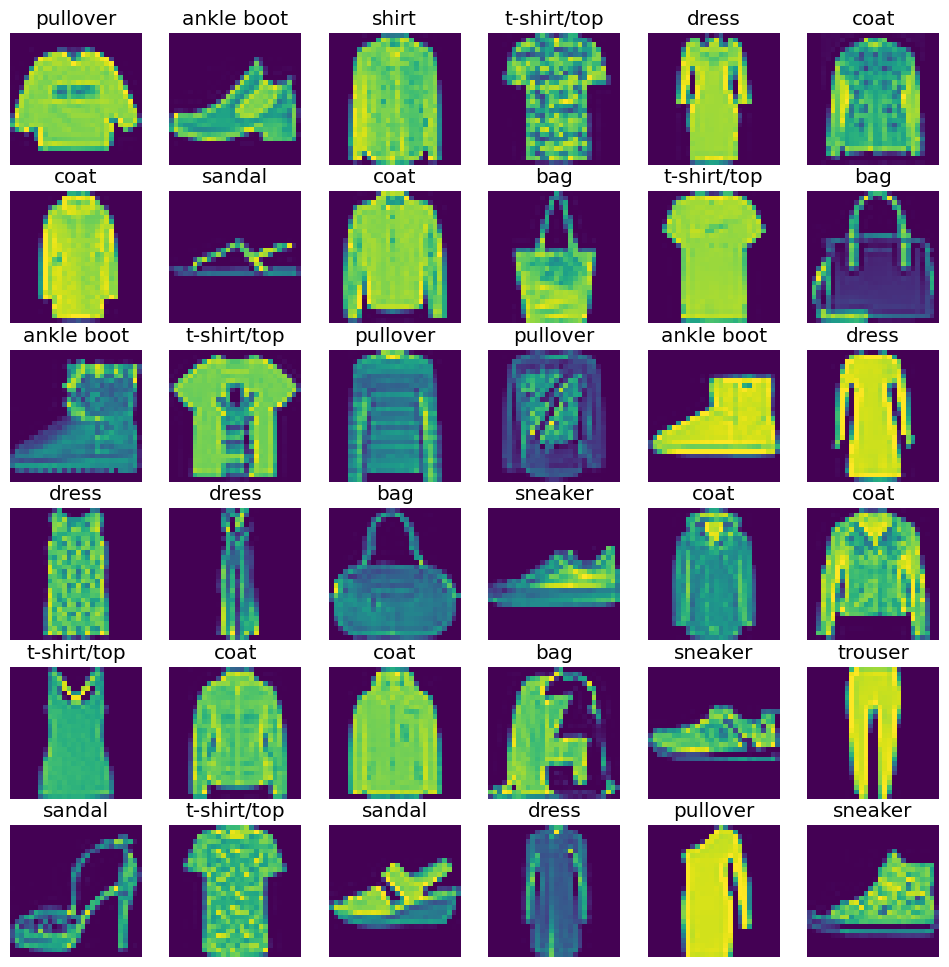

In [122]:
fig, axes = plt.subplots(6, 6, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    ax.imshow(numpy_array_to_image(train_X[i]))
    ax.set_title(labels[i])
    ax.axis('off')

plt.show()

# Data Loaders

In [152]:
# Define the hyperparameters
SIZE = 28
BATCH_SIZE = 32
EPOCH = 5
VERSION = 1

In [ ]:
# Data transformations
tfms = aug_transforms(do_flip=True, flip_vert=False, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2)

# Create a DataBlock
data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=ItemGetter(0),        # Get the image
    get_y=ItemGetter(1),        # Get the label
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    batch_tfms=[*tfms, Normalize.from_stats(*imagenet_stats)]  # Normalize images
)

# Create DataLoaders
train_data = L(zip(list(map(numpy_array_to_image, train_X)), train_Y))
dls = data_block.dataloaders(train_data, bs=BATCH_SIZE)


In [136]:
torch.save(dls, f"dataloaders/fashion_dataloader_v{VERSION}.pkl")

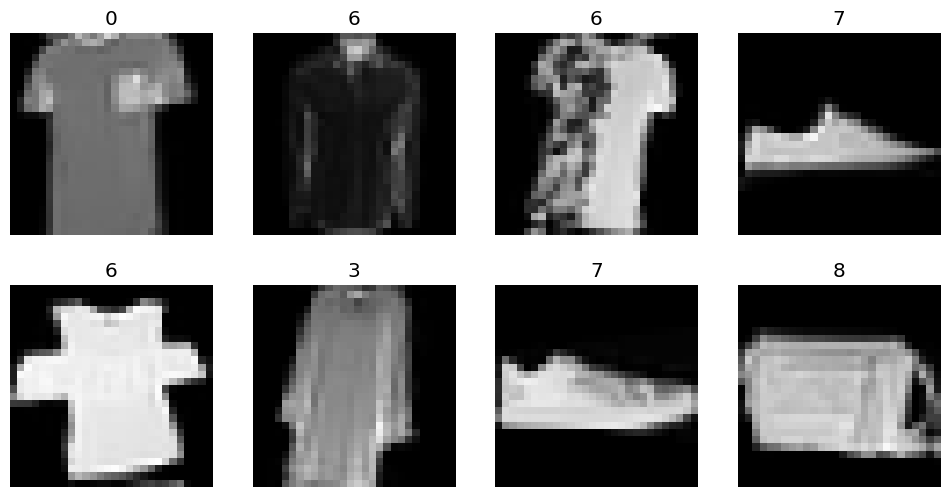

In [137]:
dls.train.show_batch(max_n=8, nrows=2)

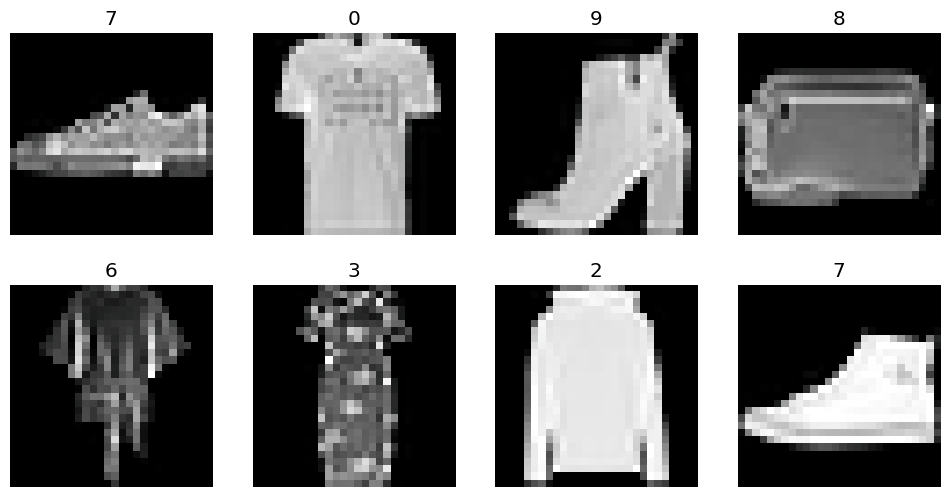

In [138]:
dls.valid.show_batch(max_n=8, nrows=2)

# Model Building

In [139]:
model_path = Path("models")

In [204]:
# Model architecture, metrics, and custom head layer
arch = resnet34
optimerzer = Adam
metrics = [error_rate, accuracy, F1Score(average='macro'), Precision(average='macro'), Recall(average='macro')]
custom_head = nn.Sequential(
    nn.AdaptiveAvgPool2d(1),  # Global Average Pooling (GAP)
    Flatten(),
    nn.Linear(512, len(dls.vocab))  # Modify the last layer to match the number of classes
)

# Create the vision model
model = vision_learner(dls, arch, metrics=metrics, custom_head=custom_head, opt_func=Adam)

In [205]:
model.summary()

Sequential (Input shape: 32 x 3 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 14 x 14   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 7 x 7     
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                        

In [206]:
# Save model summary
with open("model_summary.txt", "w") as f:
    f.write(model.summary())

# Model Training / Fine-tuning

SuggestedLRs(slide=7.585775892948732e-05, valley=1.5848931980144698e-06)

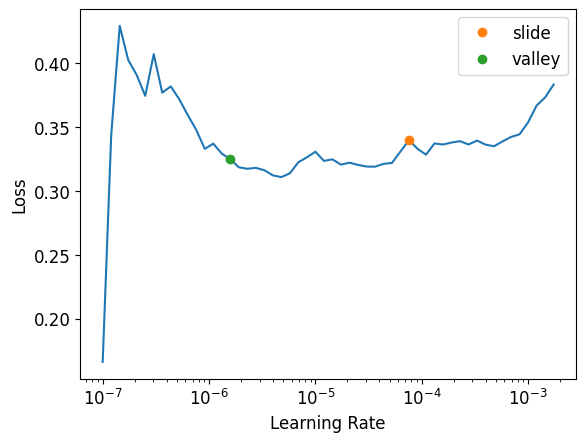

In [148]:
# Learning rate finding
model.lr_find(suggest_funcs=[slide, valley])

In [197]:
model.load(f"model_v2")

In [176]:
# Fine tune or train the model with optimum learning rate
model.fine_tune(EPOCH, base_lr=4e-6)

epoch,train_loss,valid_loss,error_rate,accuracy,f1_score,precision_score,recall_score,time
0,0.322074,0.290591,0.104167,0.895833,0.894931,0.896431,0.894309,02:12


epoch,train_loss,valid_loss,error_rate,accuracy,f1_score,precision_score,recall_score,time
0,0.309497,0.274657,0.100833,0.899167,0.897905,0.899088,0.897653,02:13
1,0.317974,0.290412,0.106000,0.894000,0.892883,0.894065,0.892378,02:14
2,0.313858,0.292935,0.104833,0.895167,0.894352,0.896181,0.893656,02:12
3,0.294750,0.278383,0.102333,0.897667,0.896544,0.897704,0.896178,02:14
4,0.308190,0.276781,0.103000,0.897000,0.895924,0.898005,0.895387,02:13


In [177]:
model.save(f"model_v{VERSION}")

Path('models/model_v2.pth')

# Model Interpretation

In [179]:
interp = ClassificationInterpretation.from_learner(model)

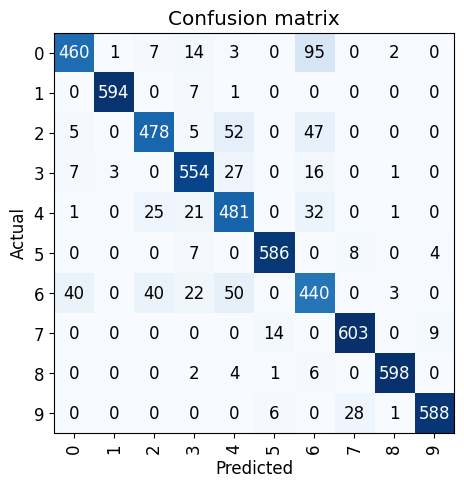

In [211]:
# Create confusion matrix
interp.plot_confusion_matrix()

# Image Cleaning (Human in the loop)

In [ ]:
cleaner = ImageClassifierCleaner(model)
cleaner

In [ ]:
cleaner.delete(), cleaner.change()

# Save the final model

In [183]:
model.export(model_path / f"model_v{VERSION}.pkl")

In [ ]:
VERSION += 1

# Generate Report

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [207]:
# Load the saved model
model = load_learner(model_path / "model_v2.pkl")

# Create a DataBlock for the test data
test_data = L(zip(list(map(numpy_array_to_image, test_X)), test_Y))
test_dl = model.dls.test_dl(test_data, with_labels=True)

# Make predictions on the test data
preds = model.get_preds(dl=test_dl, with_decoded=True)

# Calculate evaluation metrics
accuracy = accuracy_score(test_Y, preds[0].argmax(dim=1).numpy())
classification_rep = classification_report(test_Y, preds[0].argmax(dim=1).numpy())

In [210]:
# Generate the architecture summary
with open("model_summary.txt", "r") as f:
    architecture_summary = "".join(f.readlines())

# Write the results to the output file
with open("output.txt", "w") as f:
    f.write("\n\nEvaluation Metrics:\n")
    f.write(f"Accuracy: {accuracy}\n")
    f.write("\n\nClassification Report:\n")
    f.write(classification_rep)
    f.write("\n\nModel Architecture Summary:\n")
    f.write(architecture_summary)

Evaluation report saved to 'output.txt'
